In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("/content/drive/MyDrive/gpt-4.csv", engine='python', on_bad_lines='skip')

In [3]:
# read the first 3000 rows of the dataset
df.head(3000)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


In [4]:
# Use df.sample() to randomly select 1000 rows for analysis.
# dfs = df.sample(n=1000)
# dfs
df.isnull().sum()

,0
data,0
conversation,0


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


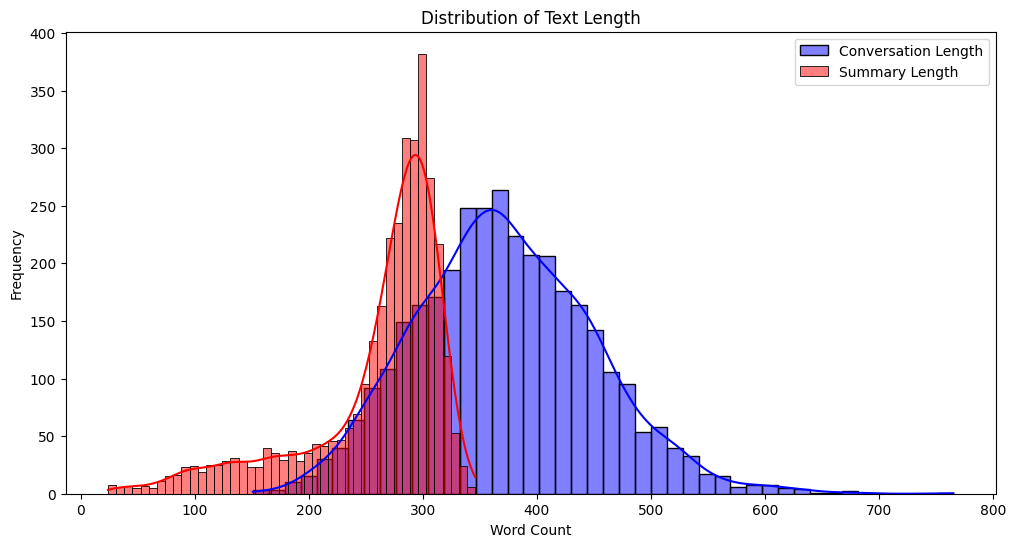

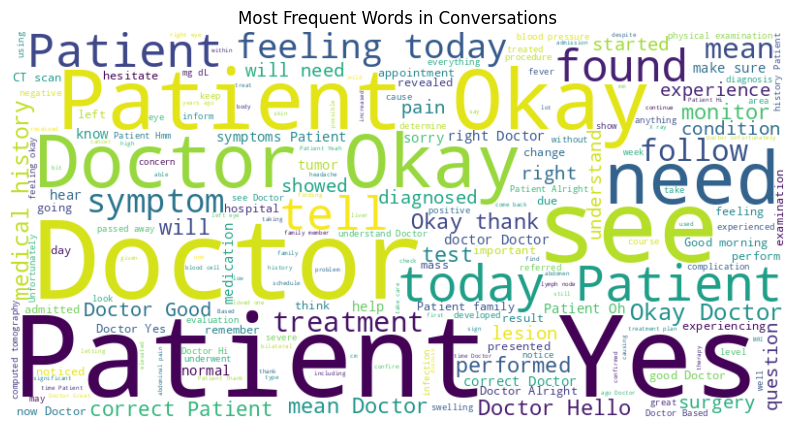

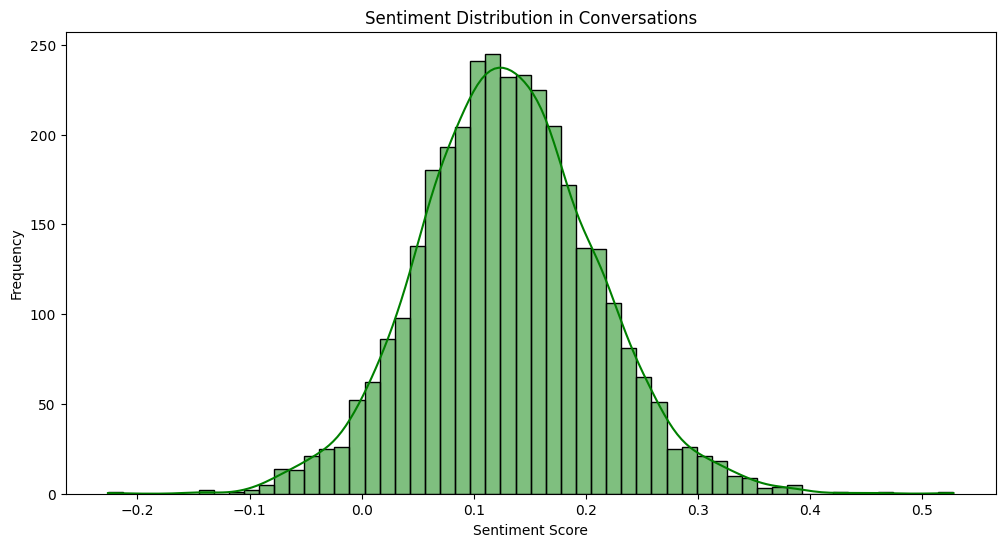

In [7]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# 3. Text Length Analysis
df['conversation_length'] = df['conversation'].apply(lambda x: len(x.split()))  # Word count for conversation
df['data_length'] = df['data'].apply(lambda x: len(x.split()))  # Word count for summary

# Plot the distribution of text length
plt.figure(figsize=(12, 6))
sns.histplot(df['conversation_length'], kde=True, color='blue', label='Conversation Length')
sns.histplot(df['data_length'], kde=True, color='red', label='Summary Length')
plt.legend()
plt.title('Distribution of Text Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud for Most Frequent Words in 'conversation'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['conversation'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Conversations')
plt.show()

# 5. Sentiment Analysis - Basic Sentiment Score (using TextBlob or similar library)
from textblob import TextBlob

df['sentiment'] = df['conversation'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment'], kde=True, color='green')
plt.title('Sentiment Distribution in Conversations')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

# 6. Word Count in Conversations using spaCy for tokenization
df['conversation_word_count'] = df['conversation'].apply(lambda x: len([token.text for token in nlp(str(x))]))

# Summary of word count
print(f"Average words in conversation: {df['conversation_word_count'].mean()}")
print(f"Average words in summary: {df['data_length'].mean()}")

Average words in conversation: 488.12203791469193
Average words in summary: 260.15225118483414


In [10]:
df.head()

,data,conversation,conversation_length,data_length,sentiment,conversation_word_count
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda...",315,216,0.226782,399
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat...",325,230,0.123464,451
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat...",358,196,0.174621,437
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat...",346,193,-0.142936,491
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda...",276,220,0.172252,390
